# Código

In [1]:
import pandas as pd
import sklearn
import scipy.io as sio
import numpy as np
from os import getcwd
from os.path import join 
import matplotlib.pyplot as plt
from scipy.fftpack import rfft, rfftfreq
from lvm_read import read
from sklearn.datasets import make_regression, make_classification, make_blobs
from sklearn import linear_model, decomposition, preprocessing,metrics, model_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt
from sklearn import metrics
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
from tqdm.notebook import tqdm_notebook as tqdm
import seaborn as sns
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

c:\Program Files\Python38\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [41]:
# Params Download Data.
case_scheme = ["R", "L", "H"]
CH_numbers = 1
na = 17

sensor_scheme=np.random.randint(1,2)
case_num = np.random.randint(1,20)

string="white_noise_"+str(case_num)+".lvm"
d=read(join(getcwd(),f'Case_{case_scheme[0]}_(+25)/Case_{case_scheme[0]}_(+25)_{sensor_scheme}/',string))
d[0]['Channel names'].pop()
df=pd.DataFrame(d[0]['data'],columns=d[0]['Channel names'])
ARmodel = AutoReg(df[f"Ch{CH_numbers}"],na).fit()
pred=np.ones(209916)
for i in range(na+1,209916):
    pred[i] = ARmodel.predict(start=i).tolist()[0]

In [ ]:
sensor_scheme=np.random.randint(1,2)
case_num = np.random.randint(1,20)

string="white_noise_"+str(case_num)+".lvm"
d_2=read(join(getcwd(),f'Case_{case_scheme[0]}_(+25)/Case_{case_scheme[0]}_(+25)_{sensor_scheme}/',string))
d_2[0]['Channel names'].pop()
df_2=pd.DataFrame(d_2[0]['data'],columns=d[0]['Channel names'])

sensor_scheme=np.random.randint(1,2)
case_num = np.random.randint(1,5)

string="white_noise_"+str(case_num)+".lvm"
d_3=read(join(getcwd(),f'Case_{case_scheme[1]}_(+25)/Case_{case_scheme[1]}_(+25)_{sensor_scheme}/',string))
d_3[0]['Channel names'].pop()
df_3=pd.DataFrame(d_3[0]['data'],columns=d[0]['Channel names'])


sensor_scheme=np.random.randint(1,2)
case_num = np.random.randint(1,5)

string="white_noise_"+str(case_num)+".lvm"
d_4=read(join(getcwd(),f'Case_{case_scheme[2]}_(+25)/Case_{case_scheme[2]}_(+25)_{sensor_scheme}/',string))
d_4[0]['Channel names'].pop()
df_4=pd.DataFrame(d_3[0]['data'],columns=d[0]['Channel names'])



ValueError: operands could not be broadcast together with shapes (209916,) (213248,) 

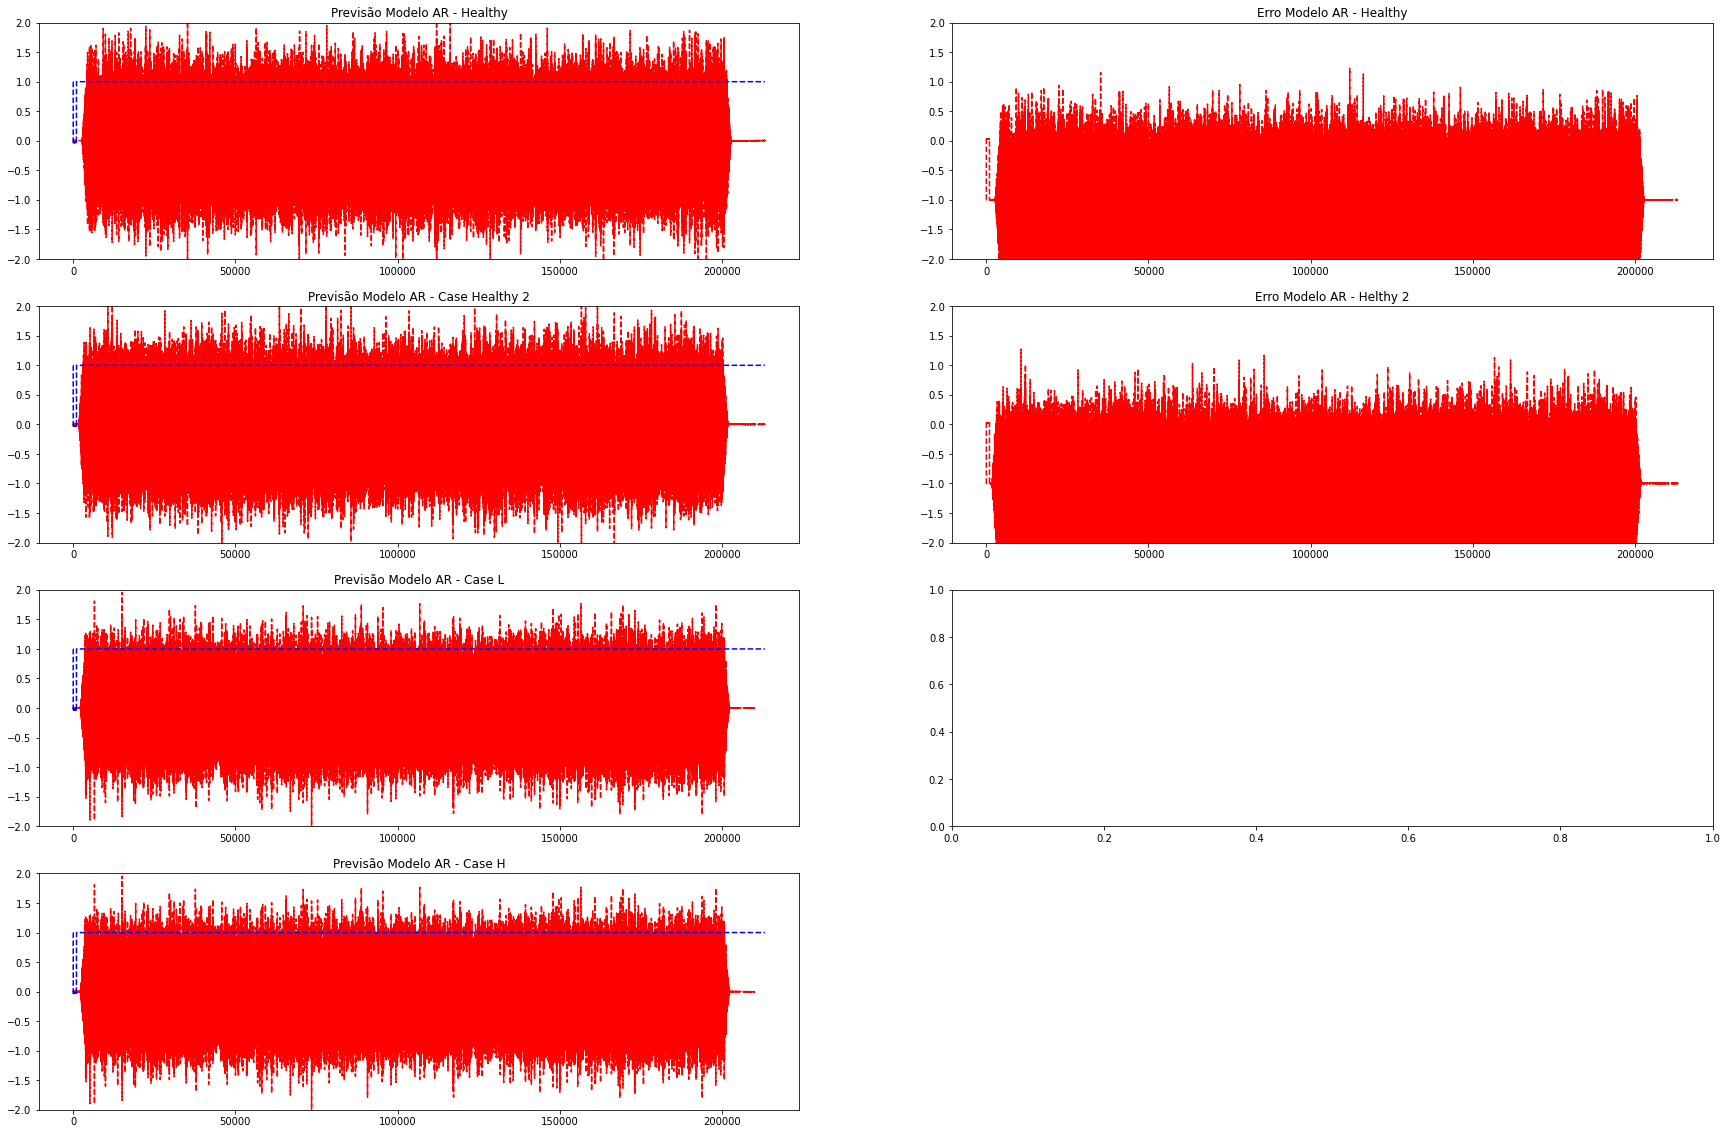

In [ ]:
fig=plt.figure(facecolor='white',figsize=(30, 20))
plt.subplot(421)
plt.plot(df[f"Ch{CH_numbers}"],'r--')
plt.plot(pred,'b--')
plt.ylim([-2,2])
plt.title('Previsão Modelo AR - Healthy')
plt.subplot(423)
plt.plot(df_2[f"Ch{CH_numbers}"],'r--')
plt.plot(pred,'b--')
plt.ylim([-2,2])
plt.title('Previsão Modelo AR - Case Healthy 2')
plt.subplot(425)
plt.plot(df_3[f"Ch{CH_numbers}"],'r--')
plt.plot(pred,'b--')
plt.ylim([-2,2])
plt.title('Previsão Modelo AR - Case L')
plt.subplot(427)
plt.plot(df_4[f"Ch{CH_numbers}"],'r--')
plt.plot(pred,'b--')
plt.ylim([-2,2])
plt.title('Previsão Modelo AR - Case H')
plt.subplot(422)
plt.plot(df[f"Ch{CH_numbers}"]-pred,'r--')
plt.ylim([-2,2])
plt.title('Erro Modelo AR - Healthy')
plt.subplot(424)
plt.plot(df_2[f"Ch{CH_numbers}"]-pred,'r--')
plt.ylim([-2,2])
plt.title('Erro Modelo AR - Helthy 2')
plt.subplot(426)
plt.plot(df_3[f"Ch{CH_numbers}"]-pred,'r--')
plt.ylim([-2,2])
plt.title('Erro Modelo AR - Case L')
plt.subplot(428)
plt.plot(df_4[f"Ch{CH_numbers}"]-pred,'r--')
plt.ylim([-2,2])
plt.title('Erro Modelo AR - Case H')
fig.show()

In [ ]:
# for i in tqdm(range(1, 41), desc=f"Case {case}"):
#     if i > 20:
#         ij = i-20
#         sensor_scheme = "2"
#     else:
#         ij=i
#         sensor_scheme ="1" # Sensor Scheme Choosed

#         string="white_noise_"+str(ij)+".lvm"
#         try:
#             d=read(join(getcwd(),f'Case_{case}_(+25)/Case_{case}_(+25)_{sensor_scheme}/',string))
#             d[0]['Channel names'].pop()
#             df=pd.DataFrame(d[0]['data'],columns=d[0]['Channel names'])
#             df_freq = []
#             for ii in range(CH_numbers,CH_numbers+1):
#                 channel_name = f"Ch{ii}"
#                 sensor_data = df[channel_name]
               

#                 if ii==1:

#                     df_freq=df_freq_act
#                 else:
#                     df_freq=np.concatenate([df_freq, df_freq_act[:209916]])
#             if i==1:
#                 df_act=np.reshape(df_freq,(1,-1))
#                 cn = pd.DataFrame([f"{sensor_scheme}_{case}_{str(ij)}_target_{str(jj+1)}"],columns=['case'])
#             else:
#                 df_act=np.row_stack([df_act,np.reshape(df_freq,(1,-1))])
#                 cn = pd.concat([cn,pd.DataFrame([f"{sensor_scheme}_{case}_{str(ij)}_target_{str(jj+1)}"],columns=['case'])])
#         except:
#             continue
#     df_act=pd.DataFrame(df_act)
#     N,Chno=df_act.shape
#     y_act=pd.DataFrame(N*[f'{jj+1}'],columns=['target'])

#     if jj == 0:
#         df_all = df_act
#         y_all = y_act
#         cn_all = cn
#     else:
#         df_all=pd.concat([df_all,df_act],axis=0,ignore_index=True)
#         y_all=pd.concat([y_all,y_act],axis=0,ignore_index=True)
#         cn_all=pd.concat([cn_all,cn],axis=0,ignore_index=True)
# df_act=[]

In [3]:
# plt.plot(x[2:],abs(np.transpose(df_all.iloc[5,:])[2:]))
# plt.plot(x[2:],abs(np.transpose(df_all.iloc[48,:])[2:]))
# #plt.plot(x[2:],abs(np.transpose(df_all.iloc[58,:])[2:]))
ARmodel.params

const      0.005233
Ch2.L1     0.804027
Ch2.L2    -1.605497
Ch2.L3     1.175394
Ch2.L4    -1.625201
Ch2.L5     0.287423
Ch2.L6    -0.407809
Ch2.L7    -0.761595
Ch2.L8     0.236824
Ch2.L9    -1.154310
Ch2.L10    0.347866
Ch2.L11   -0.500504
Ch2.L12   -0.391205
Ch2.L13   -0.063377
Ch2.L14   -0.666771
Ch2.L15    0.466786
Ch2.L16   -0.602376
Ch2.L17    0.245808
Ch2.L18   -0.355125
Ch2.L19   -0.075419
Ch2.L20    0.160314
Ch2.L21   -0.536176
Ch2.L22    0.428246
Ch2.L23   -0.381639
Ch2.L24    0.308467
Ch2.L25   -0.237837
dtype: float64

In [ ]:
# PCA

pca = PCA().fit(df_all.to_numpy())
plt.rcParams["figure.figsize"] = (12,6)
fig, ax = plt.subplots()
exp_var = pca.explained_variance_ratio_
yi = np.cumsum(exp_var)
xi = np.arange(1, len(exp_var)+1, step=1)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0,len(exp_var)+1, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=14)
plt.axhline(y=0.99, color='g', linestyle='-')
plt.text(0.5, 0.95, '99% cut-off threshold', color = 'green', fontsize=14)
plt.axhline(y=0.80, color='black', linestyle='-')
plt.text(0.5, 0.75, '80% cut-off threshold', color = 'black', fontsize=14)

ax.grid(axis='x')
plt.show()

In [ ]:
df_all_PCA = pd.DataFrame(PCA(n_components=55).fit_transform(df_all.to_numpy()))#,columns=[f'{x} Component' for x in range(1,np.size(yi)+1)])
df_parallel = pd.concat([df_all_PCA,y_all],axis=1)
import plotly.express as px
fig = pd.plotting.parallel_coordinates(df_parallel,"target",color=["lime", "tomato","dodgerblue"]) # px.parallel_coordinates(df_parallel,)


In [ ]:
df_melted = df_parallel.melt(id_vars=['target'])
sns.boxplot(data = df_melted[df_melted['variable']<=10],x='variable',y='value',hue='target')

In [ ]:
df_TSNE = pd.DataFrame(TSNE(n_components=3, learning_rate='auto', init='random').fit_transform(df_parallel[df_parallel.columns[0:-1]]))
df_TSNE = pd.concat([df_TSNE,df_parallel['target']],axis=1)
fig4=sns.pairplot(df_TSNE,hue='target',height=4)
# fig4._legend.remove()
# handles = fig4._legend_data.values()
# labels = case_scheme
# fig4.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=3,title='Categorias')
# fig4.fig.subplots_adjust(top=0.95, bottom=0.15)
# fig4.fig.suptitle('Dataset transformado por T-SNE e classificado pelo Label conhecido',fontsize=15)

In [ ]:
df_TSNE['target'].value_counts()